## Visualize filter extremes rule
Small scripting to visualize the result of the filter extremes rule. In this exammple the peaks and troughs of the water level were calculated and used to find the values of the salinity at that moment.

In [1]:
import matplotlib
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [35]:
ds = xr.open_dataset("../Example_0805_02.nc")

In [37]:
sal = ds.salinity_8.isel(mesh2d_nFaces=5)
wl = ds.water_level.isel(mesh2d_nFaces=5)
sal_peaks = ds.salinity_peaks.isel(mesh2d_nFaces=5)
sal_troughs = ds.salinity_troughs.isel(mesh2d_nFaces=5)
wl_peaks = ds.water_level_peaks.isel(mesh2d_nFaces=5)
wl_troughs = ds.water_level_troughs.isel(mesh2d_nFaces=5)

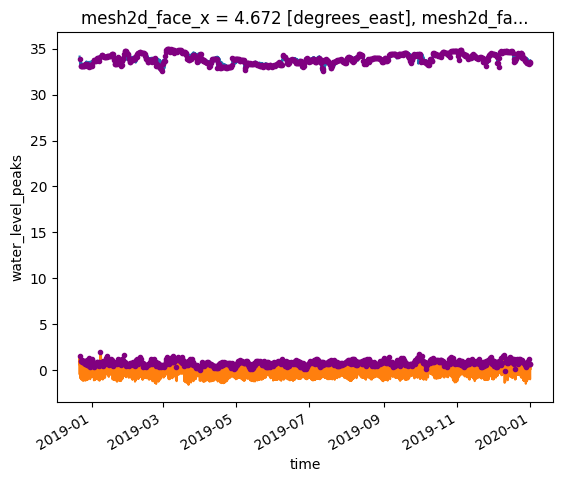

In [38]:
plt.figure()
sal.plot()
wl.plot()
sal_peaks.plot.line(color="purple", marker=".")
wl_peaks.plot.line(color="purple", marker=".")
plt.show()

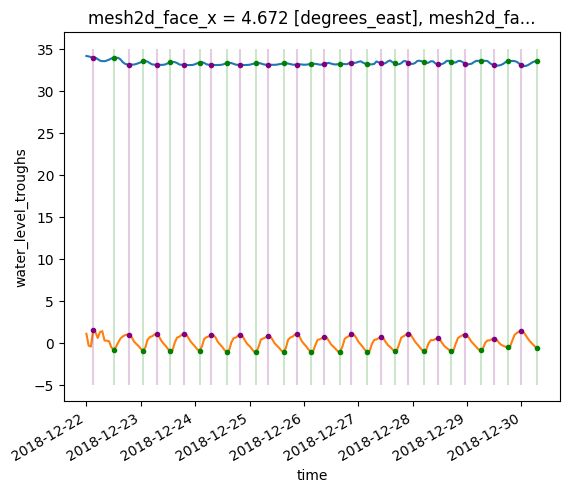

In [39]:
plt.figure()
size = 200
sal[:size].plot()
wl[:size].plot()
sal_peaks[:size].plot.line(color="purple", marker=".")
wl_peaks[:size].plot.line(color="purple", marker=".")
sal_troughs[:size].plot.line(color="green", marker=".")
wl_troughs[:size].plot.line(color="green", marker=".")
plt.vlines(sal_peaks[:size].dropna(dim="time").time, -5, 35, color="purple", alpha=0.2)
plt.vlines(sal_troughs[:size].dropna(dim="time").time, -5, 35, color="green", alpha=0.2)
plt.show()

